In [2]:
#Load Libraries
library(mlbench)
library(randomForest)
library(dplyr)

#Load the data
data(PimaIndiansDiabetes)
df<-PimaIndiansDiabetes
#Explore the length and breadth of the data
str(df)


'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


## Cross-validation

### Holdout cross-validation

In [9]:
#Setting seed for reproducability 
library(caret)
set.seed(2019)

#Create 70% train and 30% test dataset
train_index <- sample(seq_len(nrow(df)),floor(0.7 * nrow(df)))
train <- df[train_index,]
test <- df[-train_index,]
print("Training Dataset shape:")
print(dim(train))
print("Test Dataset shape:")
print(dim(test))

#Train model on train dataset
model <-randomForest(diabetes~.,data=train, mtry =3)
print(model)

#Predict on test dataset
y_predicted <- predict(model, newdata = test)

#Create Confusion-Matrix
results<-confusionMatrix(y_predicted, test$diabetes, positive= 'pos')
print("Confusion Matrix  (Test Data)- ")
print(results$table)

#Print overall Accuracy
results$overall[1]



[1] "Training Dataset shape:"
[1] 537   9
[1] "Test Dataset shape:"
[1] 231   9

Call:
 randomForest(formula = diabetes ~ ., data = train, mtry = 3) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 23.46%
Confusion matrix:
    neg pos class.error
neg 304  48   0.1363636
pos  78 107   0.4216216
[1] "Confusion Matrix  (Test Data)- "
          Reference
Prediction neg pos
       neg 133  37
       pos  15  46


Accuracy 
0.7748918

### K-fold cross-validation

In [29]:
library(caret)
set.seed(2019)

#Define function for 4 fold cross validation
train_control = trainControl(method = "cv",  number=5, savePredictions = TRUE,verboseIter = TRUE)

#Defining the value of mtry =3 (to match our previous example)
parameter_values = expand.grid(mtry=3)

#Fit the model
model_rf_kfold<- train(diabetes~., data=df, trControl=train_control, 
                    method="rf",  metric= "Accuracy", 
                    tuneGrid = parameter_values)
#Print Overall Accuracy (Averaged across all folds)
model_rf_kfold$results[2]

#Print the detailed prediction dataset
print("Shape of Prediction Dataset")
print(dim(model_rf_kfold$pred))

print("Prediction detailed results - ")
head(model_rf_kfold$pred) #print first 6 rows
tail(model_rf_kfold$pred) #print last 6 rows

print("Accuracy across each Fold-")
model_rf_kfold$resample

print(paste("Average Accuracy :",mean(model_rf_kfold$resample$Accuracy)))
print(paste("Std. Dev Accuracy :",sd(model_rf_kfold$resample$Accuracy)))


+ Fold1: mtry=3 
- Fold1: mtry=3 
+ Fold2: mtry=3 
- Fold2: mtry=3 
+ Fold3: mtry=3 
- Fold3: mtry=3 
+ Fold4: mtry=3 
- Fold4: mtry=3 
+ Fold5: mtry=3 
- Fold5: mtry=3 
Aggregating results
Fitting final model on full training set


Accuracy
0.7590782


[1] "Shape of Prediction Dataset"
[1] 768   5
[1] "Prediction detailed results - "


pred,obs,rowIndex,mtry,Resample
neg,pos,10,3,Fold1
neg,pos,24,3,Fold1
neg,neg,34,3,Fold1
neg,pos,39,3,Fold1
neg,neg,43,3,Fold1
neg,neg,48,3,Fold1


,pred,obs,rowIndex,mtry,Resample
763,neg,neg,752,3,Fold5
764,neg,neg,753,3,Fold5
765,pos,pos,755,3,Fold5
766,neg,neg,759,3,Fold5
767,neg,neg,761,3,Fold5
768,pos,pos,762,3,Fold5


[1] "Accuracy across each Fold-"


Accuracy,Kappa,Resample
0.7467532,0.4415101,Fold1
0.7662338,0.4685583,Fold2
0.7922078,0.5058163,Fold3
0.7320261,0.4108199,Fold4
0.7581699,0.4332766,Fold5


[1] "Average Accuracy : 0.759078176725236"
[1] "Std. Dev Accuracy : 0.0225461480724459"


### LOOCV

In [36]:
#Define function for 4 fold cross validation
set.seed(2019)
train_control = trainControl(method = "LOOCV", savePredictions = TRUE)

#Defining the value of mtry =3 (to match our previous example)
parameter_values = expand.grid(mtry=3)

#Fit the model
model_rf_LOOCV<- train(diabetes~., data=df, trControl=train_control, 
                    method="rf",  metric= "Accuracy", 
                    tuneGrid = parameter_values)
#Print Overall Accuracy (Averaged across all folds)
print(model_rf_LOOCV$results[2])

#Print the detailed prediction dataset
print("Shape of Prediction Dataset")
print(dim(model_rf_LOOCV$pred))

print("Prediction detailed results - ")
head(model_rf_LOOCV$pred) #print first 6 rows
 
tail(model_rf_LOOCV$pred) #print last 6 rows


   Accuracy
1 0.7721354
[1] "Shape of Prediction Dataset"
[1] 768   4
[1] "Prediction detailed results - "


pred,obs,rowIndex,mtry
pos,pos,1,3
neg,neg,2,3
pos,pos,3,3
neg,neg,4,3
pos,pos,5,3
neg,neg,6,3


,pred,obs,rowIndex,mtry
763,neg,neg,763,3
764,neg,neg,764,3
765,neg,neg,765,3
766,neg,neg,766,3
767,pos,pos,767,3
768,neg,neg,768,3


# Hyperparameter Tuning

## Grid Search optimization

[1] "Accuracy across hyperparameter Combinations:"
  mtry  Accuracy
1    1 0.7564893
2    2 0.7604108
3    3 0.7642730
4    4 0.7668704
5    5 0.7629658
6    6 0.7590697
[1] "Shape of Prediction Dataset"
[1] 4608    5
[1] "Prediction detailed results - "
  pred obs rowIndex mtry Resample
1  neg pos       10    1    Fold1
2  neg pos       24    1    Fold1
3  neg neg       34    1    Fold1
4  neg pos       39    1    Fold1
5  neg neg       43    1    Fold1
6  neg neg       48    1    Fold1
     pred obs rowIndex mtry Resample
4603  neg neg      752    6    Fold5
4604  neg neg      753    6    Fold5
4605  pos pos      755    6    Fold5
4606  neg neg      759    6    Fold5
4607  neg neg      761    6    Fold5
4608  pos pos      762    6    Fold5
[1] "Best value for Hyperparameter 'mtry':"
  mtry
4    4
[1] "Final (Best) Model "

Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variabl

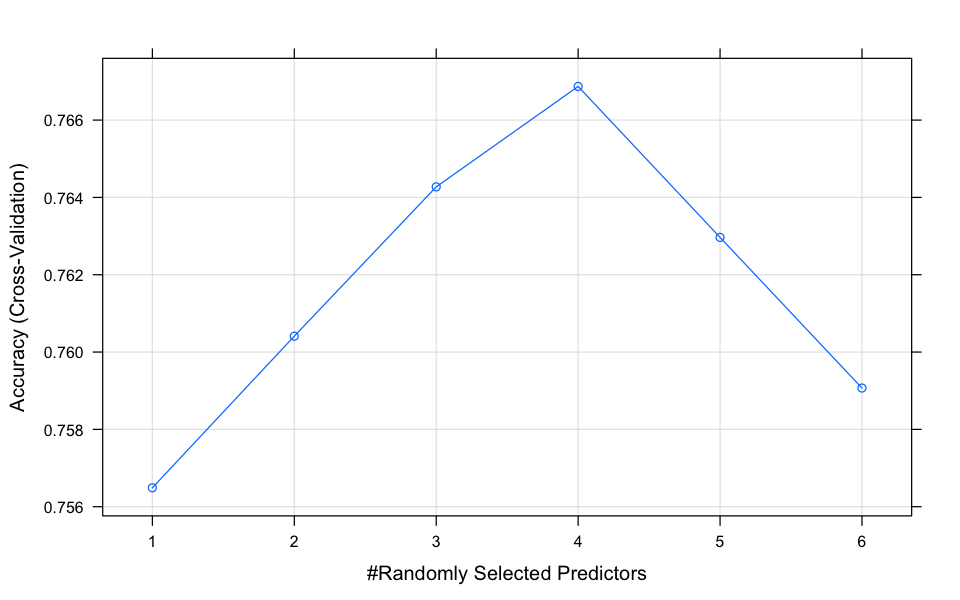

In [50]:
#Grid Search Optimization : Random Forest
#Define the Cross Validation method
set.seed(2019)
train_control = trainControl(method = "cv",  number=5, savePredictions = TRUE)

#Define Parameter Grid
parameter_grid = expand.grid(mtry=c(1,2,3,4,5,6))

#Fit the model with cross validation and grid search optimization
model_rf_gridSearch<- train(diabetes~., data=df, trControl=train_control, 
               method="rf",  metric= "Accuracy", 
               tuneGrid = parameter_grid)

#Print Overall Accuracy (Averaged across all folds)
print("Accuracy across hyperparameter Combinations:")
print(model_rf_gridSearch$results[,1:2])

#Print the detailed prediction dataset
print("Shape of Prediction Dataset")
print(dim(model_rf_gridSearch$pred))

print("Prediction detailed results - ")
print(head(model_rf_gridSearch$pred)) #print the first 6 rows

print(tail(model_rf_gridSearch$pred)) #print the last 6 rows

print("Best value for Hyperparameter 'mtry':")
print(model_rf_gridSearch$bestTune)

print("Final (Best) Model ")
print(model_rf_gridSearch$finalModel)

#Plot the grid metrics
library(repr)
options(repr.plot.width=8, repr.plot.height=5)
plot(model_rf_gridSearch)

## Grid Search Optimization : XGboost

[1] "Shape of Prediction Dataset"
[1] 49152    11
[1] "Prediction detailed results - "


pred,obs,rowIndex,eta,max_depth,gamma,colsample_bytree,min_child_weight,subsample,nrounds,Resample
neg,pos,10,0.01,2,1,0.7,1,0.6,100,Fold1
neg,pos,24,0.01,2,1,0.7,1,0.6,100,Fold1
neg,neg,34,0.01,2,1,0.7,1,0.6,100,Fold1
neg,pos,39,0.01,2,1,0.7,1,0.6,100,Fold1
neg,neg,43,0.01,2,1,0.7,1,0.6,100,Fold1
neg,neg,48,0.01,2,1,0.7,1,0.6,100,Fold1


,pred,obs,rowIndex,eta,max_depth,gamma,colsample_bytree,min_child_weight,subsample,nrounds,Resample
49147,neg,neg,752,0.3,5,1,0.7,1,0.6,60,Fold5
49148,neg,neg,753,0.3,5,1,0.7,1,0.6,60,Fold5
49149,pos,pos,755,0.3,5,1,0.7,1,0.6,60,Fold5
49150,neg,neg,759,0.3,5,1,0.7,1,0.6,60,Fold5
49151,neg,neg,761,0.3,5,1,0.7,1,0.6,60,Fold5
49152,pos,pos,762,0.3,5,1,0.7,1,0.6,60,Fold5


[1] "Best values for all selected Hyperparameters:"


,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
7,60,3,0.01,1,0.7,1,0.6


[1] "Average results across different combination of Hyperparameter Values"


eta,max_depth,gamma,colsample_bytree,min_child_weight,subsample,nrounds,Accuracy,Kappa,AccuracySD,KappaSD
0.01,3,1,0.7,1,0.6,60,0.7681691,0.4508007,0.02490697,0.04434417
0.01,3,1,0.7,1,0.6,30,0.7668534,0.4428864,0.02856019,0.05693396
0.30,5,1,0.7,1,0.6,30,0.7629913,0.4691132,0.02696340,0.04724493
0.01,3,1,0.7,1,0.6,50,0.7616501,0.4367084,0.02627113,0.05017095
0.01,3,1,0.7,1,0.6,100,0.7616416,0.4396542,0.04058293,0.08981473


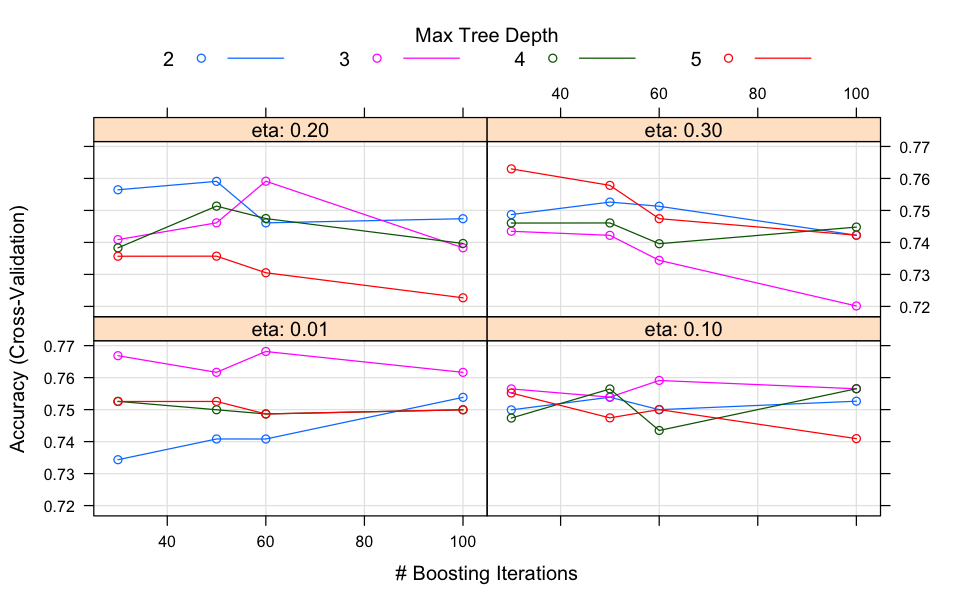

In [55]:
#Grid Search Optimization - XGBoost
set.seed(2019)
#Define the Cross Validation method
train_control = trainControl(method = "cv",  number=5, savePredictions = TRUE)

#Define Parameter Grid
parameter_grid = expand.grid(nrounds = c(30,50,60,100),
                             eta=c(0.01,0.1,0.2,0.3),
                             max_depth = c(2,3,4,5),
                             gamma = c(1),
                             colsample_bytree = c(0.7),
                             min_child_weight = c(1)  ,
                             subsample = c(0.6)
                            )

#Fit the model with cross validation and grid search optimization
model_xgb_gridSearch<- train(diabetes~., data=df, trControl=train_control, 
               method="xgbTree",  metric= "Accuracy",
                            tuneGrid = parameter_grid)

#Print the detailed prediction dataset
print("Shape of Prediction Dataset")
print(dim(model_xgb_gridSearch$pred))

print("Prediction detailed results - ")
head(model_xgb_gridSearch$pred) #print the first 6 rows

tail(model_xgb_gridSearch$pred) #print the last 6 rows

print("Best values for all selected Hyperparameters:")
model_xgb_gridSearch$bestTune

#Print Overall Accuracy (Averaged across all folds)
print("Average results across different combination of Hyperparameter Values")
model_xgb_gridSearch$results %>% arrange(desc(Accuracy)) %>% head(5)

library(repr)
options(repr.plot.width=8, repr.plot.height=5)
plot(model_xgb_gridSearch)


## Random Search - RandomForest

note: only 7 unique complexity parameters in default grid. Truncating the grid to 7 .

[1] "Shape of Prediction Dataset"
[1] 5376    5
[1] "Prediction detailed results - "


pred,obs,rowIndex,mtry,Resample
neg,pos,10,2,Fold1
neg,pos,24,2,Fold1
neg,neg,34,2,Fold1
neg,pos,39,2,Fold1
neg,neg,43,2,Fold1
neg,neg,48,2,Fold1


,pred,obs,rowIndex,mtry,Resample
5371,neg,neg,752,8,Fold5
5372,neg,neg,753,8,Fold5
5373,pos,pos,755,8,Fold5
5374,neg,neg,759,8,Fold5
5375,neg,neg,761,8,Fold5
5376,pos,pos,762,8,Fold5


[1] "Best values for all selected Hyperparameters:"


,mtry
6,7


mtry,Accuracy,Kappa,AccuracySD,KappaSD
7,0.7603939,0.4567947,0.03677616,0.07309885
3,0.7603854,0.4527638,0.01853599,0.03860119
6,0.7603769,0.4558248,0.02967553,0.05232672
8,0.7590782,0.4530061,0.03284733,0.06561930
2,0.7577880,0.4442493,0.01785522,0.02974551


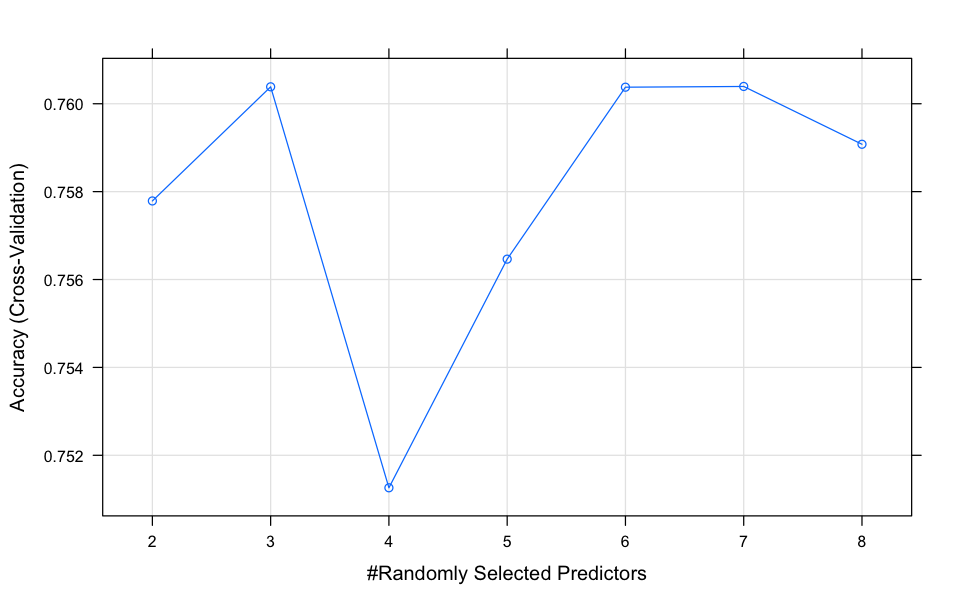

In [56]:
#Random Search Optimization - Random Forest

#Define the Cross Validation method
set.seed(2019)
train_control = trainControl(method = "cv",  number=5, savePredictions = TRUE)

#Fit the model with cross validation and grid search optimization
model_rf_randomSearch<- train(diabetes~., data=df, trControl=train_control, 
                               method="rf",  metric= "Accuracy",tuneLength = 35)

#Print the detailed prediction dataset
print("Shape of Prediction Dataset")
print(dim(model_rf_randomSearch$pred))

print("Prediction detailed results - ")
head(model_rf_randomSearch$pred) #print the first 6 rows

tail(model_rf_randomSearch$pred) #print the last 6 rows

print("Best values for all selected Hyperparameters:")
model_rf_randomSearch$bestTune

#Print Overall Accuracy (Averaged across all folds)
model_rf_randomSearch$results %>% arrange(desc(Accuracy)) %>% head(5)

plot(model_rf_randomSearch)


## Randomsearch - XGBoost

In [57]:
#Random Search Optimization - XGBoost
set.seed(2019)

#Define the Cross Validation method
train_control = trainControl(method = "cv",  number=5, savePredictions = TRUE)

#Fit the model with cross validation and random search optimization
model_xgb_randomSearch<- train(diabetes~., data=df, trControl=train_control, 
                               method="xgbTree",  metric= "Accuracy",tuneLength = 15)

#Print the detailed prediction dataset
print("Shape of Prediction Dataset")
print(dim(model_xgb_randomSearch$pred))

print("Prediction detailed results - ")
head(model_xgb_randomSearch$pred) #print the first 6 rows

tail(model_xgb_randomSearch$pred) #print the last 6 rows

print("Best values for all selected Hyperparameters:")
model_xgb_randomSearch$bestTune

#Print Overall Accuracy (Averaged across all folds for each hyperparameter combination)
model_xgb_randomSearch$results %>% arrange(desc(Accuracy)) %>% head(5)


[1] "Shape of Prediction Dataset"
[1] 10368000       11
[1] "Prediction detailed results - "


pred,obs,rowIndex,eta,max_depth,gamma,colsample_bytree,min_child_weight,subsample,nrounds,Resample
neg,pos,10,0.3,1,0,0.6,1,0.5,750,Fold1
neg,pos,24,0.3,1,0,0.6,1,0.5,750,Fold1
neg,neg,34,0.3,1,0,0.6,1,0.5,750,Fold1
neg,pos,39,0.3,1,0,0.6,1,0.5,750,Fold1
neg,neg,43,0.3,1,0,0.6,1,0.5,750,Fold1
neg,neg,48,0.3,1,0,0.6,1,0.5,750,Fold1


,pred,obs,rowIndex,eta,max_depth,gamma,colsample_bytree,min_child_weight,subsample,nrounds,Resample
10367995,neg,neg,752,0.4,15,0,0.8,1,1,700,Fold5
10367996,neg,neg,753,0.4,15,0,0.8,1,1,700,Fold5
10367997,pos,pos,755,0.4,15,0,0.8,1,1,700,Fold5
10367998,neg,neg,759,0.4,15,0,0.8,1,1,700,Fold5
10367999,neg,neg,761,0.4,15,0,0.8,1,1,700,Fold5
10368000,pos,pos,762,0.4,15,0,0.8,1,1,700,Fold5


[1] "Best values for all selected Hyperparameters:"


,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
7141,50,1,0.4,0,0.8,1,0.8928571


eta,max_depth,gamma,colsample_bytree,min_child_weight,subsample,nrounds,Accuracy,Kappa,AccuracySD,KappaSD
0.4,1,0,0.8,1,0.8928571,50,0.7682540,0.4729486,0.03702909,0.07153397
0.4,2,0,0.6,1,0.5714286,50,0.7669722,0.4814364,0.03387529,0.06442963
0.3,2,0,0.6,1,0.8214286,50,0.7656481,0.4690071,0.03393427,0.06244633
0.3,1,0,0.8,1,0.6785714,200,0.7643579,0.4664447,0.03483870,0.06367076
0.3,1,0,0.8,1,0.6071429,50,0.7643324,0.4635821,0.04090730,0.08065109


## Bayesian Optimization - Random forest

In [61]:
set.seed(2019)
library(MlBayesOpt)
model_rf_bayesain <- rf_opt(train_data = train,
                       train_label = diabetes,
                       test_data = test,
                       test_label = diabetes,
                       mtry_range = c(1L, ncol(df)-1),
                       num_tree = 50,
                       init_points = 10,
                       n_iter = 10,
                       acq = "poi", eps = 0, 
                       optkernel = list(type = "exponential", power =2))



elapsed = 0.01	Round = 1	mtry_opt = 6.3893	min_node_size = 18.0000	Value = 0.7706 
elapsed = 0.02	Round = 2	mtry_opt = 5.9899	min_node_size = 16.0000	Value = 0.7576 
elapsed = 0.01	Round = 3	mtry_opt = 3.1235	min_node_size = 6.0000	Value = 0.7706 
elapsed = 0.02	Round = 4	mtry_opt = 5.3277	min_node_size = 5.0000	Value = 0.7619 
elapsed = 0.01	Round = 5	mtry_opt = 1.3534	min_node_size = 16.0000	Value = 0.7619 
elapsed = 0.01	Round = 6	mtry_opt = 1.3025	min_node_size = 15.0000	Value = 0.7576 
elapsed = 0.01	Round = 7	mtry_opt = 6.7412	min_node_size = 2.0000	Value = 0.7619 
elapsed = 0.01	Round = 8	mtry_opt = 1.0673	min_node_size = 16.0000	Value = 0.7532 
elapsed = 0.01	Round = 9	mtry_opt = 1.7174	min_node_size = 9.0000	Value = 0.7662 
elapsed = 0.01	Round = 10	mtry_opt = 5.2600	min_node_size = 11.0000	Value = 0.7532 
elapsed = 0.01	Round = 11	mtry_opt = 1.9861	min_node_size = 9.0000	Value = 0.7489 
elapsed = 0.01	Round = 12	mtry_opt = 2.8969	min_node_size = 2.0000	Value = 0.7706 
elapsed

## Bayesian Optimization - XGBoost

In [60]:
set.seed(2019)
model_xgb_bayesian <- xgb_opt(train, diabetes, test, diabetes, 
                              objectfun ='binary:logistic', evalmetric='logloss',
                              eta_range = c(0.1, 1L), max_depth_range = c(2L, 8L),
                              nrounds_range = c(70, 160L), #subsample_range = c(0.1, 1L),
                              bytree_range = c(0.4, 1L), init_points = 4, n_iter = 10, 
                              acq = "poi", eps = 0, optkernel = list(type = "exponential", power =2))


elapsed = 0.02	Round = 1	eta_opt = 0.7929	max_depth_opt = 2.0000	nrounds_opt = 79.2242	subsample_opt = 0.2952	bytree_opt = 0.4409	Value = 0.0087 
elapsed = 0.03	Round = 2	eta_opt = 0.7416	max_depth_opt = 2.0000	nrounds_opt = 124.7715	subsample_opt = 0.2755	bytree_opt = 0.8202	Value = 0.1688 
elapsed = 0.04	Round = 3	eta_opt = 0.3730	max_depth_opt = 7.0000	nrounds_opt = 139.2836	subsample_opt = 0.7253	bytree_opt = 0.6249	Value = 0.0043 
elapsed = 0.03	Round = 4	eta_opt = 0.6564	max_depth_opt = 2.0000	nrounds_opt = 129.4488	subsample_opt = 0.6719	bytree_opt = 0.6815	Value = 0.0216 
elapsed = 0.03	Round = 5	eta_opt = 0.5129	max_depth_opt = 5.0000	nrounds_opt = 114.9992	subsample_opt = 0.2747	bytree_opt = 0.8206	Value = 0.5325 
elapsed = 0.03	Round = 6	eta_opt = 0.5089	max_depth_opt = 6.0000	nrounds_opt = 114.8970	subsample_opt = 0.7368	bytree_opt = 0.9446	Value = 0.3203 
elapsed = 0.05	Round = 7	eta_opt = 0.3130	max_depth_opt = 5.0000	nrounds_opt = 150.5627	subsample_opt = 0.6758	bytree_o